In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping


In [44]:

# Load the MIT-BIH Training Dataset
mitbih_train_path = '/Users/apple/Desktop/ECG HEART BEAT/archive/mitbih_train.csv'
mitbih_train = pd.read_csv(mitbih_train_path, header=None)

print("MIT-BIH Training Data (First 5 rows):\n", mitbih_train.head())
# Display the shape of the MIT-BIH training dataset
print("MIT-BIH Training Data Shape: ", mitbih_train.shape)


MIT-BIH Training Data (First 5 rows):
         0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1

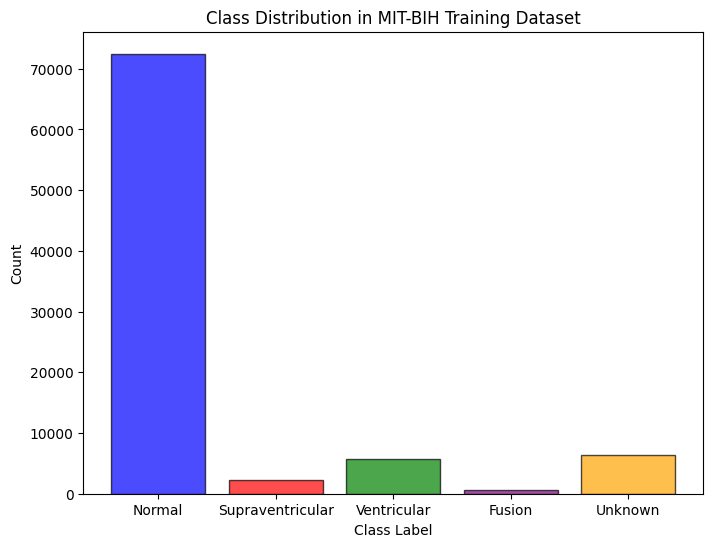

In [45]:
# Data visualization

class_counts = mitbih_train.iloc[:, -1].value_counts()

# Plot class distribution with updated class label mapping
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange', 'green', 'red', 'purple'], edgecolor='black', alpha=0.7)
plt.title("Class Distribution in MIT-BIH Training Dataset")
plt.xlabel("Class Label")
plt.ylabel("Count")

# Assuming the class labels are from 0 to 4 and represent: Normal, Supraventricular, Ventricular, Fusion, Unknown
plt.xticks([0, 1, 2, 3, 4], ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown'])
plt.show()

In [46]:
# Split data into features and labels
X = mitbih_train.iloc[:, :-1].values
y = mitbih_train.iloc[:, -1].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [47]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

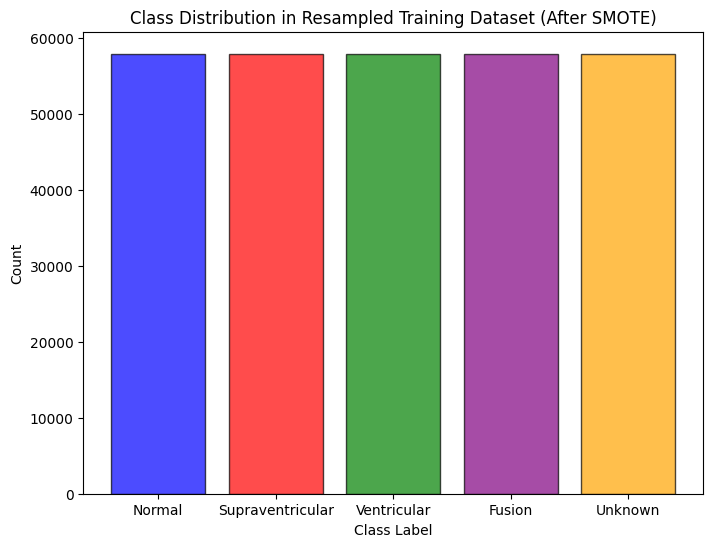

In [48]:
# Visualize class distribution after applying SMOTE
resampled_class_counts = pd.Series(y_train_resampled).value_counts()
plt.figure(figsize=(8, 6))
plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['blue', 'orange', 'green', 'red', 'purple'], edgecolor='black', alpha=0.7)
plt.title("Class Distribution in Resampled Training Dataset (After SMOTE)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks([0, 1, 2, 3, 4], ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown'])
plt.show()

In [49]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Reshape data for LSTM, GRU, RNN, and CNN models
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))

In [51]:
# Function to build and evaluate each model
def evaluate_model(model, model_name):
    print(f"Training the {model_name} model...")
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_reshaped, y_train_resampled, validation_data=(X_val_reshaped, y_val), epochs=50, batch_size=32, verbose=1)

    # Predict on validation set
    y_pred = np.argmax(model.predict(X_val_reshaped), axis=1)

    # Print evaluation metrics
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')

    print(f"{model_name} Model Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(classification_report(y_val, y_pred))

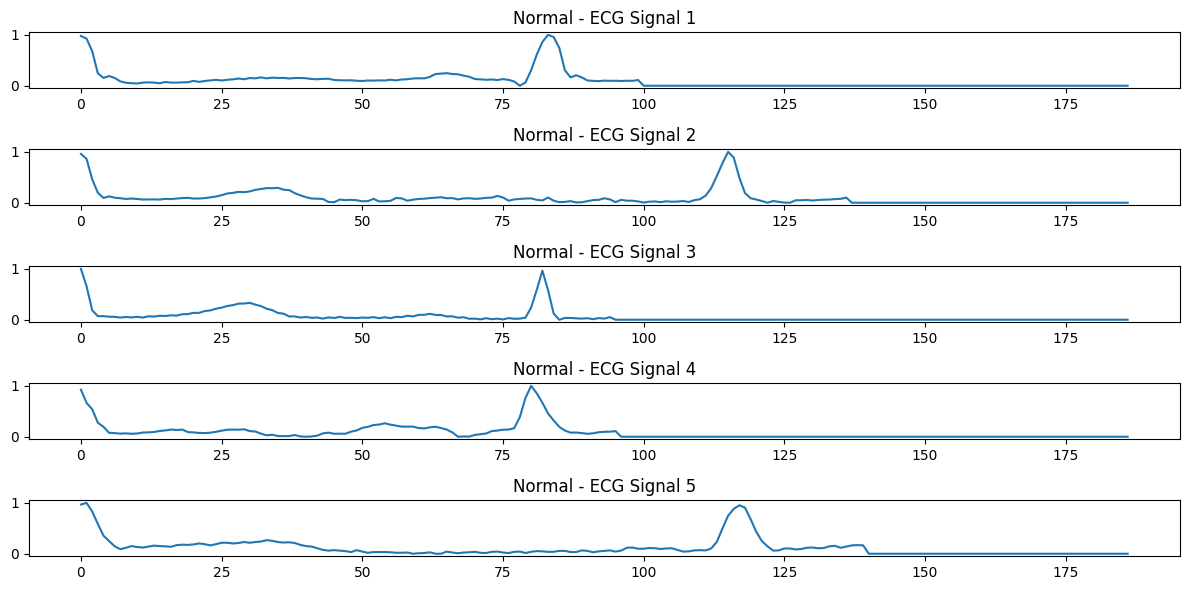

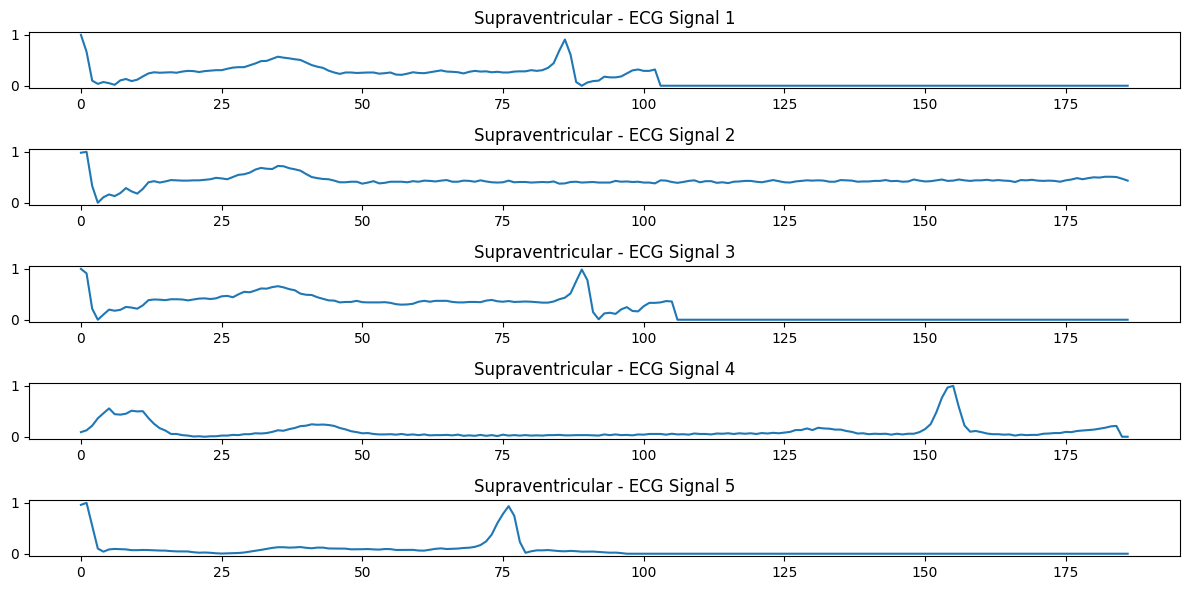

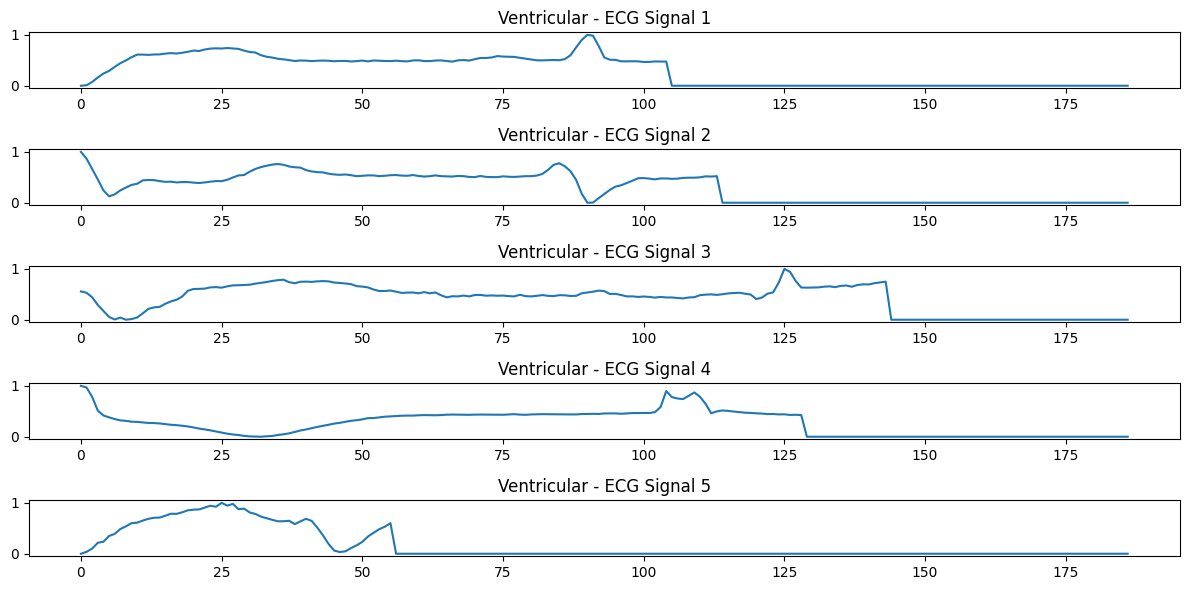

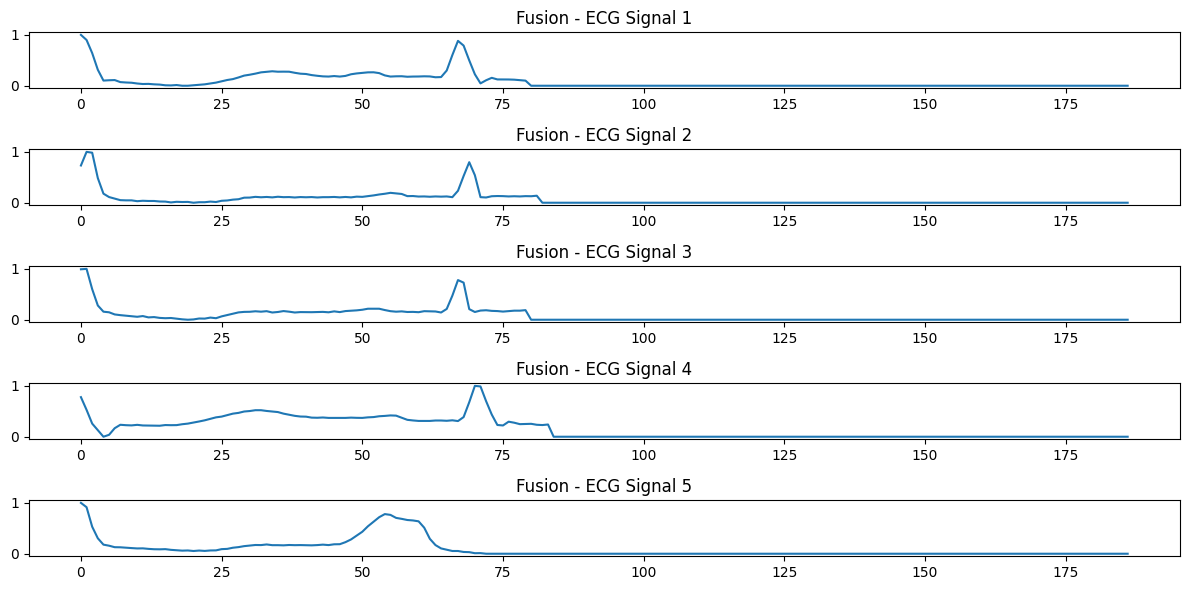

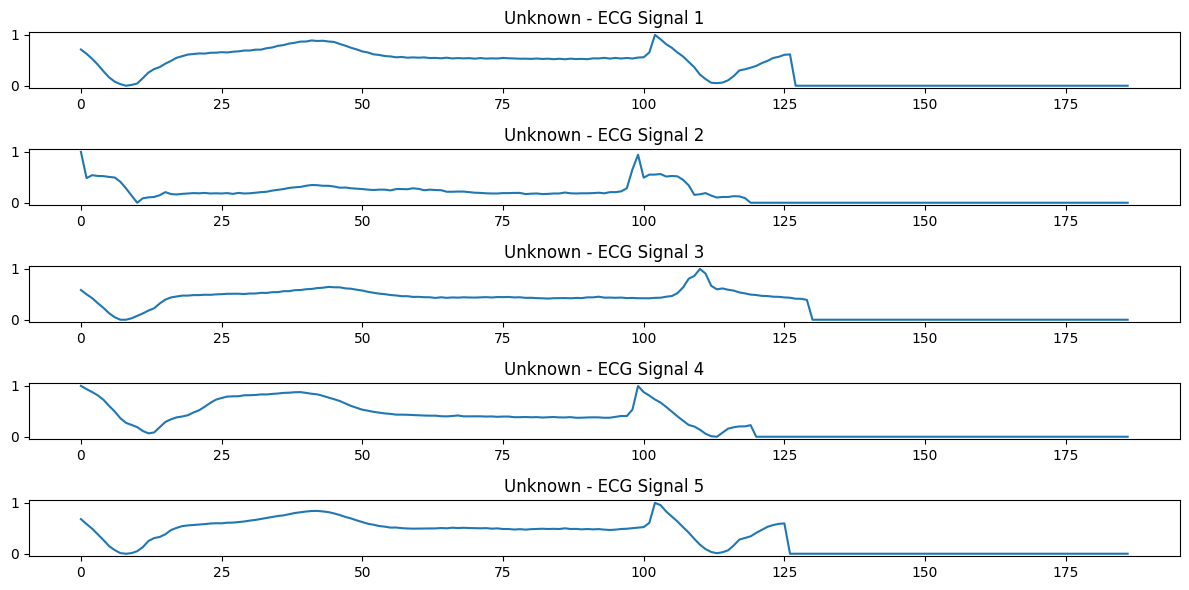

In [ ]:

# Define the mapping from class labels to their corresponding names
class_names = {0: 'Normal', 1: 'Supraventricular', 2: 'Ventricular', 3: 'Fusion', 4: 'Unknown'}

def plot_ecg_signals_by_class(X, y, num_samples=1500, class_names=class_names):
    """
    Plot ECG signals for each class from the MIT-BIH dataset.
    
    :param X: ECG signal data (2D array)
    :param y: Corresponding class labels for the signals
    :param num_samples: Number of samples to plot
    :param class_names: Dictionary mapping class labels to class names
    """
    # Loop over each class label
    for class_label in range(5):
        # Find indices of ECG signals for the current class
        class_indices = [i for i, label in enumerate(y) if label == class_label]
        
        # Plot the first few signals for the current class
        plt.figure(figsize=(12, 6))
        for i, idx in enumerate(class_indices[:5]):  # Plot first 5 signals of this class
            plt.subplot(5, 1, i+1)
            plt.plot(X[idx, :num_samples])
            plt.title(f"{class_names[class_label]} - ECG Signal {i+1}")
            plt.tight_layout()
        plt.show()

# Call the function to visualize ECG signals for each class
plot_ecg_signals_by_class(X, y)



In [27]:

# Build and evaluate LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], 1)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Dense(5, activation='softmax'))
evaluate_model(lstm_model, "LSTM")


Training the LSTM model...
Epoch 1/50
9059/9059 [==============================] - 477s 52ms/step - loss: 1.1106 - accuracy: 0.5583 - val_loss: 1.1740 - val_accuracy: 0.5141
Epoch 2/50
9059/9059 [==============================] - 469s 52ms/step - loss: 1.3290 - accuracy: 0.4194 - val_loss: 1.4661 - val_accuracy: 0.1980
Epoch 3/50
9059/9059 [==============================] - 459s 51ms/step - loss: 1.2101 - accuracy: 0.5044 - val_loss: 1.4504 - val_accuracy: 0.1034
Epoch 4/50
9059/9059 [==============================] - 457s 50ms/step - loss: 1.1143 - accuracy: 0.5488 - val_loss: 1.3893 - val_accuracy: 0.3796
Epoch 5/50
9059/9059 [==============================] - 443s 49ms/step - loss: 0.9333 - accuracy: 0.6381 - val_loss: 1.0506 - val_accuracy: 0.6132
Epoch 6/50
9059/9059 [==============================] - 749s 83ms/step - loss: 0.7300 - accuracy: 0.7469 - val_loss: 0.7584 - val_accuracy: 0.7584
Epoch 7/50
9059/9059 [==============================] - 444s 49ms/step - loss: 0.5585 - acc

In [15]:
# Build and evaluate GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(X_train_reshaped.shape[1], 1)))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(50, activation='relu'))
gru_model.add(Dense(5, activation='softmax'))
evaluate_model(gru_model, "GRU")

Training the GRU model...
Epoch 1/50
9059/9059 [==============================] - 450s 49ms/step - loss: 0.7954 - accuracy: 0.6959 - val_loss: 0.5170 - val_accuracy: 0.8462
Epoch 2/50
9059/9059 [==============================] - 472s 52ms/step - loss: 0.3492 - accuracy: 0.8780 - val_loss: 0.4052 - val_accuracy: 0.8703
Epoch 3/50
9059/9059 [==============================] - 486s 54ms/step - loss: 0.2553 - accuracy: 0.9110 - val_loss: 0.3858 - val_accuracy: 0.8611
Epoch 4/50
9059/9059 [==============================] - 596s 66ms/step - loss: 0.2044 - accuracy: 0.9298 - val_loss: 0.3006 - val_accuracy: 0.8877
Epoch 5/50
9059/9059 [==============================] - 598s 66ms/step - loss: 0.1751 - accuracy: 0.9410 - val_loss: 0.2764 - val_accuracy: 0.9039
Epoch 6/50
9059/9059 [==============================] - 774s 85ms/step - loss: 0.1528 - accuracy: 0.9489 - val_loss: 0.3061 - val_accuracy: 0.8973
Epoch 7/50
9059/9059 [==============================] - 668s 74ms/step - loss: 0.1394 - accu

In [25]:
# Build and evaluate CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(5, activation='softmax'))
evaluate_model(cnn_model, "CNN")

Training the CNN model...
Epoch 1/50
9059/9059 [==============================] - 62s 7ms/step - loss: 0.1654 - accuracy: 0.9411 - val_loss: 0.1599 - val_accuracy: 0.9495
Epoch 2/50
9059/9059 [==============================] - 61s 7ms/step - loss: 0.0710 - accuracy: 0.9753 - val_loss: 0.1212 - val_accuracy: 0.9664
Epoch 3/50
9059/9059 [==============================] - 60s 7ms/step - loss: 0.0527 - accuracy: 0.9819 - val_loss: 0.1191 - val_accuracy: 0.9706
Epoch 4/50
9059/9059 [==============================] - 64s 7ms/step - loss: 0.0434 - accuracy: 0.9856 - val_loss: 0.1293 - val_accuracy: 0.9700
Epoch 5/50
9059/9059 [==============================] - 63s 7ms/step - loss: 0.0379 - accuracy: 0.9874 - val_loss: 0.1216 - val_accuracy: 0.9750
Epoch 6/50
9059/9059 [==============================] - 61s 7ms/step - loss: 0.0342 - accuracy: 0.9884 - val_loss: 0.1290 - val_accuracy: 0.9743
Epoch 7/50
9059/9059 [==============================] - 56s 6ms/step - loss: 0.0305 - accuracy: 0.9898 -

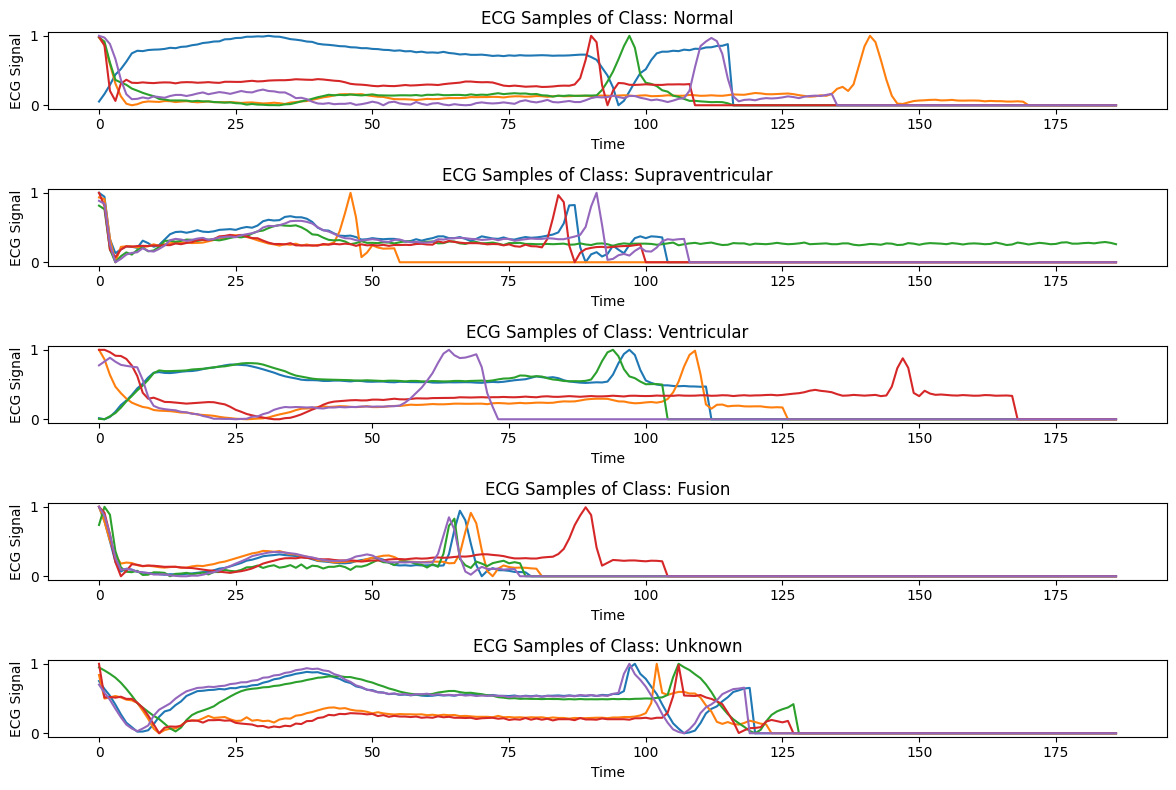

In [61]:
import matplotlib.pyplot as plt

# Plotting ECG signal for different classes (assuming X_train has the ECG data and y_train has labels)
def plot_ecg_class_samples(X, y, class_labels, num_samples=5):
    plt.figure(figsize=(12, 8))
    for i, label in enumerate(class_labels):
        plt.subplot(len(class_labels), 1, i+1)
        samples = X[y == i][:num_samples]  # Get a few samples of this class
        for sample in samples:
            plt.plot(sample)
        plt.title(f"ECG Samples of Class: {label}")
        plt.xlabel("Time")
        plt.ylabel("ECG Signal")
    plt.tight_layout()
    plt.show()

class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']
plot_ecg_class_samples(X_train, y_train, class_labels)
